# Challenge: Backtest on Other Datasets

## Download data from `yfinance`

In [1]:
import yfinance as yf

ticker = 'NFLX'
df = yf.download(ticker, multi_level_index=False, auto_adjust=False)
df

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2025-06-04,1239.660034,1239.660034,1242.560059,1219.880005,1220.729980,2359400
2025-06-05,1250.520020,1250.520020,1262.810059,1237.290039,1240.599976,2817200
2025-06-06,1241.469971,1241.469971,1260.000000,1235.550049,1259.410034,2557000
2025-06-09,1224.459961,1224.459961,1238.880005,1221.569946,1238.880005,2403100
2025-06-10,1203.619995,1203.619995,1227.520020,1180.609985,1227.520020,4454400
2025-06-11,1219.880005,1219.880005,1228.290039,1196.010010,1202.599976,2382300
2025-06-12,1215.030029,1215.030029,1230.000000,1211.959961,1222.589966,2084600
2025-06-13,1212.150024,1212.150024,1220.619995,1201.890015,1206.589966,2210300
2025-06-16,1225.349976,1225.349976,1226.250000,1212.199951,1212.199951,2112800


## Preprocess the data

### Filter the date range

- Since 1 year ago at least

In [2]:
df = df.loc['2020-01-01':].copy()
df

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2025-06-04,1239.660034,1239.660034,1242.560059,1219.880005,1220.729980,2359400
2025-06-05,1250.520020,1250.520020,1262.810059,1237.290039,1240.599976,2817200
2025-06-06,1241.469971,1241.469971,1260.000000,1235.550049,1259.410034,2557000
2025-06-09,1224.459961,1224.459961,1238.880005,1221.569946,1238.880005,2403100
2025-06-10,1203.619995,1203.619995,1227.520020,1180.609985,1227.520020,4454400
2025-06-11,1219.880005,1219.880005,1228.290039,1196.010010,1202.599976,2382300
2025-06-12,1215.030029,1215.030029,1230.000000,1211.959961,1222.589966,2084600
2025-06-13,1212.150024,1212.150024,1220.619995,1201.890015,1206.589966,2210300
2025-06-16,1225.349976,1225.349976,1226.250000,1212.199951,1212.199951,2112800


### Create the target variable

#### Percentage change

- Percentage change on `Adj Close` for tomorrow

In [3]:
df['change_tomorrow'] = df['Adj Close'].pct_change(-1)
df.change_tomorrow

Date
2025-06-04   -0.008684
2025-06-05    0.007290
2025-06-06    0.013892
2025-06-09    0.017314
2025-06-10   -0.013329
2025-06-11    0.003992
2025-06-12    0.002376
2025-06-13   -0.010772
2025-06-16    0.003834
2025-06-17   -0.001325
2025-06-18   -0.007406
2025-06-20   -0.017654
2025-06-23   -0.019990
2025-06-24    0.003027
2025-06-25   -0.024046
2025-06-26   -0.012433
2025-06-27   -0.011956
2025-06-30    0.035196
2025-07-01    0.006802
2025-07-02   -0.009498
2025-07-03         NaN
Name: change_tomorrow, dtype: float64

If you look at the change from the first day to the next one, the price decreases. Therefore, the first value of the previous output should be negative.

In [4]:
df['Adj Close']

Date
2025-06-04    1239.660034
2025-06-05    1250.520020
2025-06-06    1241.469971
2025-06-09    1224.459961
2025-06-10    1203.619995
2025-06-11    1219.880005
2025-06-12    1215.030029
2025-06-13    1212.150024
2025-06-16    1225.349976
2025-06-17    1220.670044
2025-06-18    1222.290039
2025-06-20    1231.410034
2025-06-23    1253.540039
2025-06-24    1279.109985
2025-06-25    1275.250000
2025-06-26    1306.670044
2025-06-27    1323.119995
2025-06-30    1339.130005
2025-07-01    1293.599976
2025-07-02    1284.859985
2025-07-03    1297.180054
Name: Adj Close, dtype: float64

We shall multiply by -1:

In [5]:
df.change_tomorrow = df.change_tomorrow * -1
df

,Adj Close,Close,High,Low,Open,Volume,change_tomorrow
Date,,,,,,,
2025-06-04,1239.660034,1239.660034,1242.560059,1219.880005,1220.729980,2359400,0.008684
2025-06-05,1250.520020,1250.520020,1262.810059,1237.290039,1240.599976,2817200,-0.007290
2025-06-06,1241.469971,1241.469971,1260.000000,1235.550049,1259.410034,2557000,-0.013892
2025-06-09,1224.459961,1224.459961,1238.880005,1221.569946,1238.880005,2403100,-0.017314
2025-06-10,1203.619995,1203.619995,1227.520020,1180.609985,1227.520020,4454400,0.013329
2025-06-11,1219.880005,1219.880005,1228.290039,1196.010010,1202.599976,2382300,-0.003992
2025-06-12,1215.030029,1215.030029,1230.000000,1211.959961,1222.589966,2084600,-0.002376
2025-06-13,1212.150024,1212.150024,1220.619995,1201.890015,1206.589966,2210300,0.010772
2025-06-16,1225.349976,1225.349976,1226.250000,1212.199951,1212.199951,2112800,-0.003834


To better read the data, we shall multiply by 100 to have percentage values:

In [6]:
df.change_tomorrow = df.change_tomorrow * 100
df

,Adj Close,Close,High,Low,Open,Volume,change_tomorrow
Date,,,,,,,
2025-06-04,1239.660034,1239.660034,1242.560059,1219.880005,1220.729980,2359400,0.868438
2025-06-05,1250.520020,1250.520020,1262.810059,1237.290039,1240.599976,2817200,-0.728978
2025-06-06,1241.469971,1241.469971,1260.000000,1235.550049,1259.410034,2557000,-1.389185
2025-06-09,1224.459961,1224.459961,1238.880005,1221.569946,1238.880005,2403100,-1.731441
2025-06-10,1203.619995,1203.619995,1227.520020,1180.609985,1227.520020,4454400,1.332919
2025-06-11,1219.880005,1219.880005,1228.290039,1196.010010,1202.599976,2382300,-0.399165
2025-06-12,1215.030029,1215.030029,1230.000000,1211.959961,1222.589966,2084600,-0.237595
2025-06-13,1212.150024,1212.150024,1220.619995,1201.890015,1206.589966,2210300,1.077239
2025-06-16,1225.349976,1225.349976,1226.250000,1212.199951,1212.199951,2112800,-0.383390


#### Drop rows with any missing data

In [7]:
df = df.dropna().copy()
df

,Adj Close,Close,High,Low,Open,Volume,change_tomorrow
Date,,,,,,,
2025-06-04,1239.660034,1239.660034,1242.560059,1219.880005,1220.729980,2359400,0.868438
2025-06-05,1250.520020,1250.520020,1262.810059,1237.290039,1240.599976,2817200,-0.728978
2025-06-06,1241.469971,1241.469971,1260.000000,1235.550049,1259.410034,2557000,-1.389185
2025-06-09,1224.459961,1224.459961,1238.880005,1221.569946,1238.880005,2403100,-1.731441
2025-06-10,1203.619995,1203.619995,1227.520020,1180.609985,1227.520020,4454400,1.332919
2025-06-11,1219.880005,1219.880005,1228.290039,1196.010010,1202.599976,2382300,-0.399165
2025-06-12,1215.030029,1215.030029,1230.000000,1211.959961,1222.589966,2084600,-0.237595
2025-06-13,1212.150024,1212.150024,1220.619995,1201.890015,1206.589966,2210300,1.077239
2025-06-16,1225.349976,1225.349976,1226.250000,1212.199951,1212.199951,2112800,-0.383390


#### BONUS: how to interpret the distribution of a continuous variable

Based on the following normal distribution:

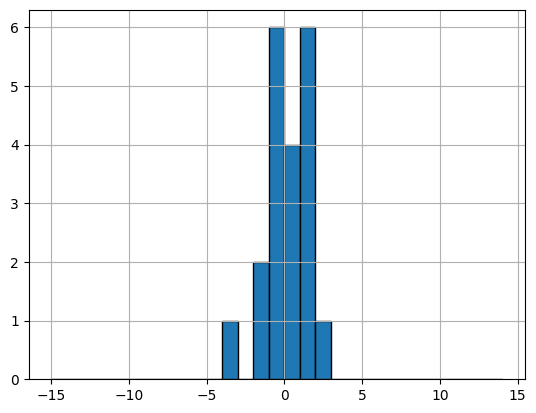

In [8]:
df.change_tomorrow.hist(bins=range(-15,15), edgecolor='black');

And the standard deviation:

In [9]:
df.change_tomorrow.std()

1.429996639591434

We can say that 68% of the changes are between -3.5 and 3.5, approximately.

#### Change sign

Did the stock go up or down?

In [10]:
import numpy as np

In [11]:
df.change_tomorrow = np.where(df.change_tomorrow > 0, 1, -1)
df

,Adj Close,Close,High,Low,Open,Volume,change_tomorrow
Date,,,,,,,
2025-06-04,1239.660034,1239.660034,1242.560059,1219.880005,1220.729980,2359400,1
2025-06-05,1250.520020,1250.520020,1262.810059,1237.290039,1240.599976,2817200,-1
2025-06-06,1241.469971,1241.469971,1260.000000,1235.550049,1259.410034,2557000,-1
2025-06-09,1224.459961,1224.459961,1238.880005,1221.569946,1238.880005,2403100,-1
2025-06-10,1203.619995,1203.619995,1227.520020,1180.609985,1227.520020,4454400,1
2025-06-11,1219.880005,1219.880005,1228.290039,1196.010010,1202.599976,2382300,-1
2025-06-12,1215.030029,1215.030029,1230.000000,1211.959961,1222.589966,2084600,-1
2025-06-13,1212.150024,1212.150024,1220.619995,1201.890015,1206.589966,2210300,1
2025-06-16,1225.349976,1225.349976,1226.250000,1212.199951,1212.199951,2112800,-1


## Compute Machine Learning model

Proposal: Random Forest within `ensemble` module of `sklearn` library

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model = RandomForestClassifier(max_depth=7, random_state=42)

In [14]:
y = df.change_tomorrow
X = df.drop(columns='change_tomorrow')

In [15]:
model.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
model.score(X, y)

1.0

## Backtesting

### Create the strategy

In [17]:
from backtesting import Strategy

/usr/local/lib/python3.10/site-packages/backtesting/_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [18]:
class SimpleClassificationUD(Strategy):
    def init(self):
        self.model = model
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[-1:, :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        # conditions to sell or buy
        if forecast_tomorrow == 1 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow == -1 and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

### Run the Backtest

In [19]:
from backtesting import Backtest

In [20]:
bt = Backtest(
    X, SimpleClassificationUD, cash=10000,
    commission=.002, exclusive_orders=True
)

In [21]:
results = bt.run()

### Show the report in a DataFrame

In [22]:
results.to_frame('Value').loc[:'Return [%]']

,Value
Start,2025-06-04 00:00:00
End,2025-07-02 00:00:00
Duration,28 days 00:00:00
Exposure Time [%],70.0
Equity Final [$],11326.523869
Equity Peak [$],11326.523869
Commissions [$],279.103514
Return [%],13.265239


## Plot the backtest report

> Don't worry about this new tool just yet, we will explain in a future chapter how to interpret the following chart.

In [ ]:
bt.plot(filename='backtest_report.html', open_browser=False)

GridPlot(id='p1329', ...)

## How to invest based on the numerical increase?

> Instead of the direction (UP or DOWN)

Next chapter → [Backtesting with Regression Models]()

Classification Model | Regression Model
-|-
![](src/pred_classification.png) | ![](src/pred_regression.png)

Classification Strategy | Regression Strategy
-|-
![](src/res_classification.png) | ![](src/res_regression.png)